In [1]:
!git clone https://github.com/prism-pro/DD2360HT22.git



Cloning into 'DD2360HT22'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 51 (delta 19), reused 39 (delta 10), pack-reused 0
Unpacking objects: 100% (51/51), done.


In [2]:
!mkdir cufiles
!cp -f DD2360HT22/hw_3/*.cu ./cufiles


**ex1**

In [3]:
!nvcc -I/usr/local/cuda-11/samples/common/inc ./cufiles/lab3_ex1.cu -o ex1

In [10]:
!./ex1 131070

/bin/bash: ./ex1: No such file or directory


In [10]:
!/usr/local/cuda-11/bin/nv-nsight-cu-cli ./ex1 131070

The input length is 131070
==PROF== Connected to process 1234 (/content/ex1)
Time comsuption of copying memory of 131070 data to the GPU is 0.000598 s 
==PROF== Profiling "vecAdd" - 1: 0%....50%....100% - 8 passes
 Time comsuption of computing  131070 data in the GPU is 0.808582 s 
 Time comsuption of copying memory of 131070 data to the host is 0.000850 s 
 the results are equal.==PROF== Disconnected from process 1234
[1234] ex1@127.0.0.1
  vecAdd(double*, double*, double*, int), 2023-Jan-01 18:35:39, Context 1, Stream 7
    Section: GPU Speed Of Light
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           4.87
    SM Frequency                                                             cycle/usecond                         568.07
    Elapsed Cycles                                                        

In [11]:
import subprocess 
import re
import numpy as np


collect output time comsuption 

In [ ]:
sizes = np.linspace(131070, 13107000, 6)
mem_h2d=[]
kernel=[]
mem_d2h=[]

for i in sizes:
  p = subprocess.run(f'./ex1 {i}', shell=True, capture_output=True)
  txt = p.stdout.decode('utf-8')
  numbers=re.findall("\d+\.?\d*", txt) 
  mem_h2d.append(float(numbers[2])) 
  kernel.append(float(numbers[4]))
  mem_d2h.append(float(numbers[6]))
print(mem_h2d)
print(kernel)
print(mem_d2h)

[0.000539, 0.009088, 0.018052, 0.027223, 0.035484, 0.043668]
[9.9e-05, 0.000311, 0.00053, 0.000753, 0.001009, 0.001278]
[0.000831, 0.017426, 0.028227, 0.041048, 0.054869, 0.066689]


In [12]:
from tables import index
import matplotlib.pyplot as plt
import pandas as pd
# create data
df= pd.DataFrame([mem_h2d,kernel,mem_d2h],
                columns=sizes,
                index=['mem_h2d','kernel','mem_d2h'])
df=df.T
print(df)
df.plot(kind='bar',stacked=True,xlabel="size",)
plt.show()

NameError: ignored

**EX 2**

In [7]:
!nvcc -I/usr/local/cuda-11/samples/common/inc ./cufiles/lab3_ex2.cu -o ex2





In [32]:
!./ex2 128 128 128 128

Input matrix dim (128 x 128) (128 x 128) (128 x 128)
Time to copy memory from  Host to Device: 0.000121
Time of running kernel: 0.000147
Time to copy memory from  Device to Host: 0.000131
the results are equal.

In [9]:
!/usr/local/cuda-11/bin/nv-nsight-cu-cli ./ex2 511 1023 1023 4094

Input matrix dim (511 x 1023) (1023 x 4094) (511 x 4094)
==PROF== Connected to process 3625 (/content/ex2)
Time to copy memory from  Host to Device: 0.008333
==PROF== Profiling "gemm" - 1: 0%....50%....100% - 8 passes
Time of running kernel: 1.237589
Time to copy memory from  Device to Host: 0.010910
the results are equal.==PROF== Disconnected from process 3625
[3625] ex2@127.0.0.1
  gemm(double*, double*, double*, int, int, int, int), 2023-Jan-01 15:54:03, Context 1, Stream 7
    Section: GPU Speed Of Light
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           4.99
    SM Frequency                                                             cycle/usecond                         584.82
    Elapsed Cycles                                                                   cycle                     33,545,94

In [ ]:
ARow=["512", "563", "614", "665", "716" ,"768"]
ACol=["1024", "1228", "1433", "1638", "1843" ,"2048"]
BCol=["4096", "4915", "5734", "6553" ,"7372", "8192"]
mem_h2d_2=[]
kernel_2=[]
mem_d2h_2=[]
for i in range(6):
  inst="./ex2 "+ ARow[i]+" "+ACol[i]+" " +ACol[i]+" " +BCol[i]
  print(inst)
  p = subprocess.run(inst, shell=True,stdout=subprocess.PIPE)
  txt = p.stdout.decode('utf-8')
  numbers=re.findall("\d+\.?\d*", txt) 
  print(numbers)
  mem_h2d_2.append(float(numbers[6])) 
  kernel_2.append(float(numbers[7]))
  mem_d2h_2.append(float(numbers[8]))
print(mem_h2d_2)
print(kernel_2)
print(mem_d2h_2)

./ex2 512 1024 1024 4096
['512', '1024', '1024', '4096', '512', '4096', '0.004281', '0.030722', '0.005875']
./ex2 563 1228 1228 4915
['563', '1228', '1228', '4915', '563', '4915', '0.005960', '0.063553', '0.007454']
./ex2 614 1433 1433 5734
['614', '1433', '1433', '5734', '614', '5734', '0.007855', '0.090647', '0.009694']
./ex2 665 1638 1638 6553
['665', '1638', '1638', '6553', '665', '6553', '0.010145', '0.127135', '0.011626']
./ex2 716 1843 1843 7372
['716', '1843', '1843', '7372', '716', '7372', '0.012665', '0.147113', '0.013764']
./ex2 768 2048 2048 8192
['768', '2048', '2048', '8192', '768', '8192', '0.015747', '0.172241', '0.016009']
[0.004281, 0.00596, 0.007855, 0.010145, 0.012665, 0.015747]
[0.030722, 0.063553, 0.090647, 0.127135, 0.147113, 0.172241]
[0.005875, 0.007454, 0.009694, 0.011626, 0.013764, 0.016009]


                         mem_h2d    kernel   mem_d2h
(512,1024)*(1024,4096)  0.004281  0.030722  0.005875
(563,1228)*(1228,4915)  0.005960  0.063553  0.007454
(614,1433)*(1433,5734)  0.007855  0.090647  0.009694
(665,1638)*(1638,6553)  0.010145  0.127135  0.011626
(716,1843)*(1843,7372)  0.012665  0.147113  0.013764
(768,2048)*(2048,8192)  0.015747  0.172241  0.016009


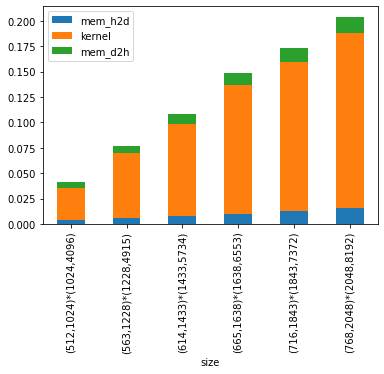

In [ ]:
sizes_2=[]
for i in range(6):
  sizes_2.append("("+ ARow[i]+","+ACol[i]+")*(" +ACol[i]+"," +BCol[i]+")")
df= pd.DataFrame([mem_h2d_2,kernel_2,mem_d2h_2],
                columns=sizes_2,
                index=['mem_h2d','kernel','mem_d2h'])
df=df.T
print(df)
df.plot(kind='bar',stacked=True,xlabel="size")
plt.show()

**Ex3**

In [37]:
!nvcc -I/usr/local/cuda-11/samples/common/inc ./cufiles/lab3_ex3.cu -o ex3

In [39]:
!./ex3 204800

The input length is 204800
the results are equal.51;43;41;60;52;40;50;44;48;58;56;64;62;65;42;70;54;49;55;43;54;51;38;38;51;54;49;45;60;39;55;42;55;54;56;47;48;54;49;49;41;55;53;44;58;44;58;49;68;49;50;51;53;47;45;59;54;46;44;38;60;64;51;45;59;44;50;62;50;70;54;51;51;62;56;49;56;53;47;37;49;49;39;46;51;42;45;59;43;48;65;42;45;39;53;51;71;47;49;47;47;51;39;51;49;52;57;47;42;52;46;58;51;52;44;47;60;48;50;55;53;54;56;57;46;53;50;38;38;43;52;47;37;59;54;41;53;45;54;51;46;61;58;49;54;54;38;52;57;36;59;42;59;44;48;57;51;50;44;58;55;50;53;52;48;43;49;54;51;46;52;64;53;61;50;51;40;45;57;50;47;46;43;49;46;48;48;58;50;50;46;50;49;41;58;44;43;58;47;46;47;70;53;59;49;52;47;53;58;57;45;44;45;67;47;38;57;50;51;58;55;51;63;43;51;43;45;53;45;37;46;41;64;49;55;57;49;54;38;49;54;54;58;40;60;49;47;41;54;54;44;46;54;47;53;54;49;38;70;56;51;62;56;55;43;57;65;56;57;46;52;56;48;45;52;44;54;50;58;59;38;40;49;56;42;38;48;58;51;50;49;62;59;56;41;47;51;46;42;55;43;49;60;44;48;28;51;40;63;59;45;61;53;51;48;53;51;

In [61]:
from prompt_toolkit.utils import to_int
result = subprocess.run(['./ex3', '409600'], stdout=subprocess.PIPE)
txt = result.stdout.decode('utf-8')
histogram = txt.split('\n')[-1].split(';')
del histogram[0]
del histogram[-1]
for i in range(len(histogram)):
  histogram[i]= to_int(histogram[i])
##print(histogram)
##print(type(histogram))

[112  97  92 ... 107  89  93]
<class 'numpy.int64'>


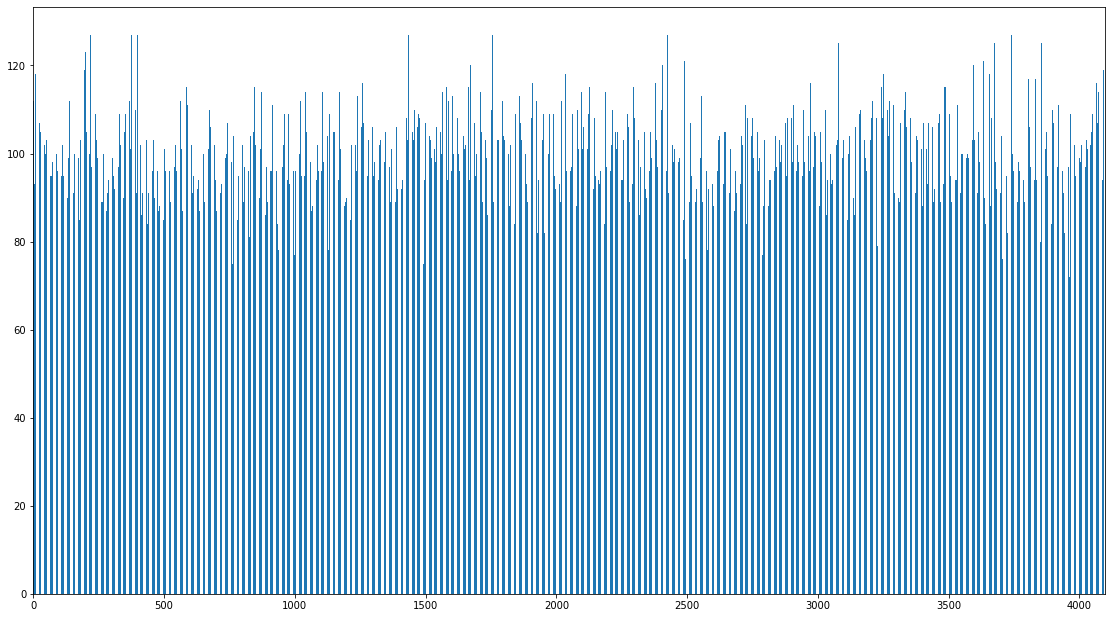

In [60]:
plt.figure(figsize=(19.2,10.8))
x=np.linspace(1,4095,4095,endpoint=True)
y=np.array(histogram)
bins = list(range(1,len(histogram)+1))
print(y)
print(type(y[0]))
plt.bar(x,y,width=0.5)
plt.xlim(0,4096)
plt.show()

In [62]:

!/usr/local/cuda-11/bin/nv-nsight-cu-cli ./ex3 1024

The input length is 1024
==PROF== Connected to process 37730 (/content/ex3)
==PROF== Profiling "histogram_kernel" - 1: 0%....50%....100% - 8 passes
==PROF== Profiling "convert_kernel" - 2: 0%....50%....100% - 8 passes
the results are equal.0;0;0;1;0;0;0;0;0;0;0;0;1;0;0;0;0;0;2;0;0;0;0;0;1;0;1;0;0;0;0;1;1;0;0;1;0;0;0;0;0;1;0;0;0;1;1;0;0;0;0;1;0;1;0;0;0;0;0;0;0;0;1;0;0;1;1;0;0;0;0;0;2;0;0;0;0;1;0;0;0;1;0;0;0;0;0;1;0;0;0;0;1;0;0;0;1;0;0;1;0;0;2;1;0;0;0;0;0;0;0;0;2;0;0;0;0;1;1;0;1;0;0;0;0;1;0;1;0;1;0;0;0;1;0;0;0;1;1;1;1;1;0;0;0;2;0;0;0;1;0;0;0;0;0;2;0;0;1;2;0;0;0;1;1;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;1;0;0;0;0;0;1;0;0;1;0;0;0;0;0;0;1;1;1;1;0;0;0;1;0;0;0;0;1;0;2;0;0;1;0;0;0;0;0;0;1;1;1;0;0;0;1;0;1;0;1;1;1;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;2;0;0;1;1;0;0;0;0;0;0;0;1;0;0;0;0;2;0;0;0;1;0;1;1;0;0;0;1;0;0;1;0;1;1;0;0;0;1;0;0;0;0;0;0;0;0;1;0;0;0;0;1;0;1;0;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;1;1;1;1;0;0;0;0;0;0;1;2;0;0;0;0;1;0;0;0;1;0;0;1;0;0;0;0;0;0;0;0;0;0;1;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;

Ex4


In [3]:
##copy source code to google drive in advance
%cd drive/MyDrive/sputniPIC

!make all

/content/sputniPIC-DD2360
mkdir -p ./bin
[ -d src ] || mkdir src
nvcc -std=c++11 -I./include -O3 -g -Xcompiler -Wall src/RW_IO.cpp -c -o src/RW_IO.o
[ -d src ] || mkdir src
nvcc -std=c++11 -I./include -O3 -g -Xcompiler -Wall src/ConfigFile.cpp -c -o src/ConfigFile.o
[ -d src ] || mkdir src
nvcc -std=c++11 -I./include -O3 -g -Xcompiler -Wall src/BC.cpp -c -o src/BC.o
[ -d src ] || mkdir src
nvcc -std=c++11 -I./include -O3 -g -Xcompiler -Wall src/EMfield.cpp -c -o src/EMfield.o
[ -d src ] || mkdir src
nvcc -std=c++11 -I./include -O3 -g -Xcompiler -Wall src/Timing.cpp -c -o src/Timing.o
[ -d src ] || mkdir src
nvcc -std=c++11 -I./include -O3 -g -Xcompiler -Wall src/sputniPIC.cpp -c -o src/sputniPIC.o
In file included from src/sputniPIC.cpp:25:0:
./include/IC.h: In function ‘void initGEM(parameters*, grid*, EMfield*, EMfield_aux*, particles*, interpDensSpecies*)’:
./include/IC.h:82:25: warning: unused variable ‘sign’ [-Wunused-variable]
     double prob, theta, sign;
                      

In [4]:
!./bin/sputniPIC.out inputfiles/GEM_2D.inp


-------------------------
sputniPIC Sim. Parameters
-------------------------
Number of species    = 4
Number of particles of species 0 = 4096000	 (MAX = 4096000)  QOM = -64
Number of particles of species 1 = 4096000	 (MAX = 4096000)  QOM = 1
Number of particles of species 2 = 4096000	 (MAX = 4096000)  QOM = -64
Number of particles of species 3 = 4096000	 (MAX = 4096000)  QOM = 1
x-Length                 = 40
y-Length                 = 20
z-Length                 = 1
Number of cells (x)      = 256
Number of cells (y)      = 128
Number of cells (z)      = 1
Time step                = 0.25
Number of cycles         = 10
Results saved in: data
*************************************************
**  Initialize GEM Challenge with Pertubation  **
*************************************************
** B0x = 0.0195
** B0y = 0
** B0z = 0
** Delta (current sheet thickness) = 0.5
** rho species 0 = 1 CURRENT SHEET 
** rho species 1 = 1 CURRENT SHEET 
** rho species 2 = 0.02 BACKGROUND 
** rho species